# FRAUD DETECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Fraud.csv')

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.shape

(6362620, 11)

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**None of the columns have Null value.**

In [7]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

**8213 Transactions are Fraud.**

In [8]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

**16 Transactions are Flagged Fraud.**

In [9]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) *100 ,2)

np.float64(0.13)

**0.13% of Transactions are Fraud.**

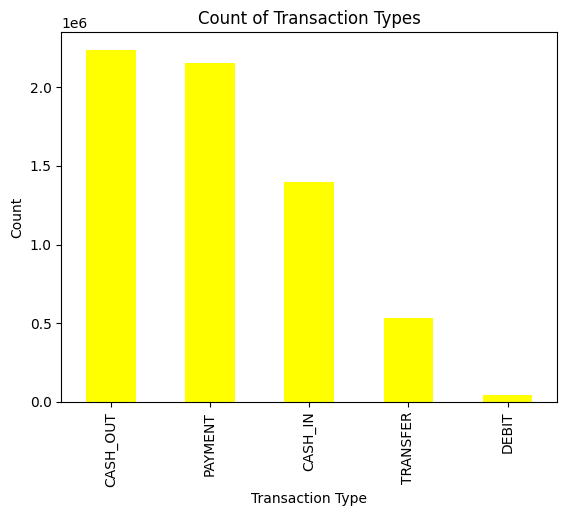

In [10]:
df["type"].value_counts().plot(kind="bar", title='Count of Transaction Types', color='yellow')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

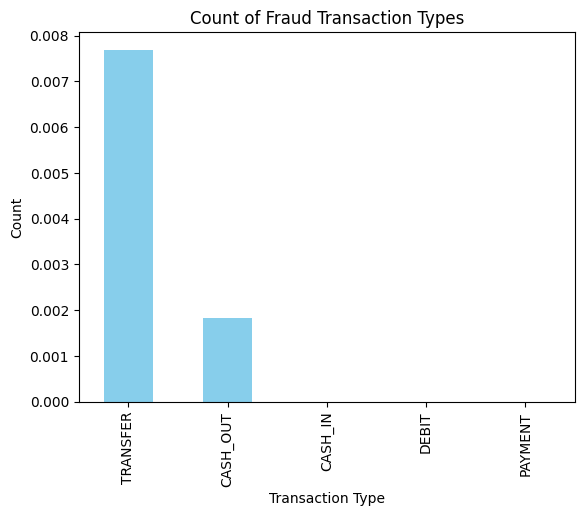

In [94]:
fraudtype=df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraudtype.plot(kind='bar', title='Count of Fraud Transaction Types', color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

**Most of the Fraud Transactions were 'TRANSFER' or 'CASH_OUT' payment type.**

In [12]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

**Great difference between Mean value and Standard Deviation value signifies there are OUTLIERS.**

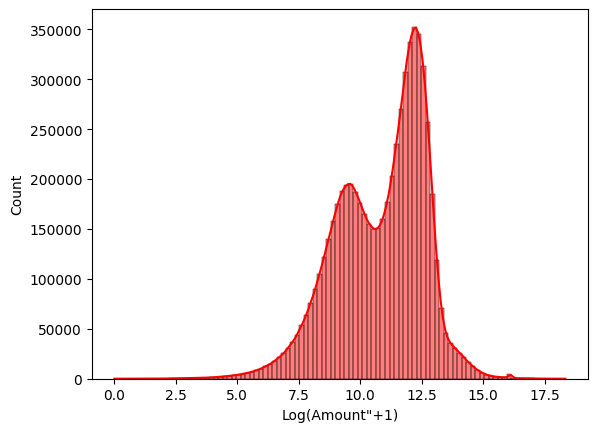

In [13]:
sns.histplot(np.log1p(df['amount']),kde=True, bins=100, color='red')
plt.xlabel('Log(Amount+1)')
plt.show()

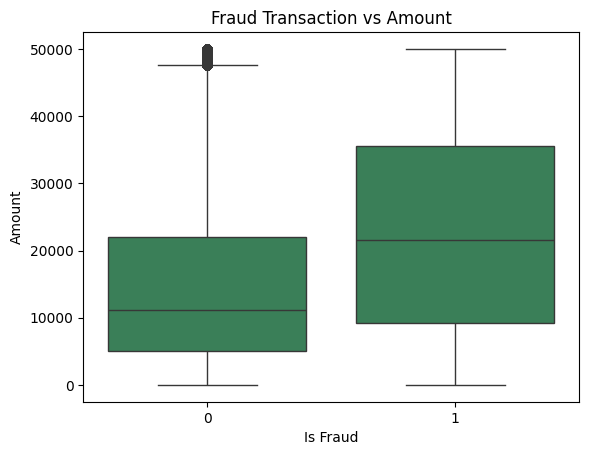

In [95]:
sns.boxplot(x='isFraud',y='amount', data=df[df['amount']<50000], color='seagreen' )
plt.title("Fraud Transaction vs Amount")
plt.xlabel("Is Fraud")
plt.ylabel("Amount")
plt.show()

**Fraud Transactions consist of Higher Amounts than Normal Transactions.**

In [15]:
top_senders=df['nameOrig'].value_counts().head(10)

In [16]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [17]:
top_receivers=df['nameDest'].value_counts().head(10)

In [18]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

**There are large number of repetitive Recievers.**

In [19]:
corr=df[['amount', "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", 'isFraud']].corr()

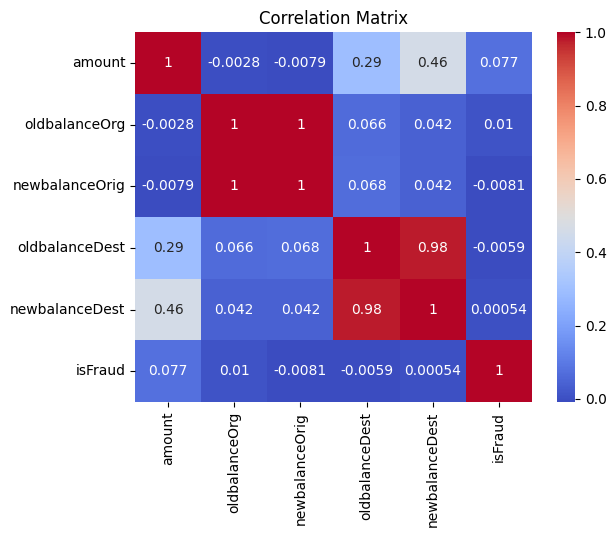

In [87]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [74]:
df_model=df.drop(['nameOrig','nameDest','isFlaggedFraud','step'], axis=1)

Remove the columns that are not required in the model.

In [75]:
categorical=['type']
numeric=['amount', "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

Categorise the data based on Transaction type and define all the Numeric columns.

In [76]:
y= df_model["isFraud"]
X=df_model.drop("isFraud", axis=1)

'X' Feature matrix containing the input variables while 'y' feature Target variable.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)

Test size allocates 30% of the data for testing and 70% for training. Stratify ensures that the class distribution of the target variable is preserved in both training and testing sets.

In [78]:
preprocessor=ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"

)

The ColumnTransformer applies different preprocessing steps to numerical and categorical features. Numerical variables are standardized using StandardScaler, while categorical variables are converted into dummy variables using OneHotEncoder.

In [79]:
pipeline=Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

The pipeline combines data preprocessing and model training into a single workflow.

In [80]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains spa

In [81]:
y_pred=pipeline.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.93      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In the model most fraudulent transactions are successfully identified. However, precision is low due to class imbalance, leading to a high number of false positives.

In [83]:
confusion_matrix(y_test, y_pred)

array([[1804248,  102074],
       [    168,    2296]])

The confusion matrix shows that the model detects most fraudulent transactions with very few misses, but at the cost of a large number of false positives due to severe class imbalance.

In [85]:
pipeline.score(X_test, y_test) * 100

94.64361117485144

**The pipeline achieves an accuracy of 94.64%.**